In [1]:
import pandas as pd

file_path = 'disfluence_intervalles.txt'

try:
    with open(file_path, 'r', encoding='utf-8') as file:
        lines= file.readlines()
except UnicodeDecodeError:
    print("error of encoding")

intervals = []

for line in lines:
    parts = line.split(" ")
    # time et label
    interval_number = parts[1][:-1]  # deux points : 
    start_time = float(parts[2])# text to float, trop long
    end_time = float(parts[4])
    duration = float(parts[4]) - float(parts[2]) # durée
    label = " ".join(parts[6:])  # fini par espace blanc
    label = label.strip()  # pauseB\n

    if label.strip() != "":
        intervals.append([interval_number, round(start_time,1), round(duration,1),label])
       
# DataFrame
df = pd.DataFrame(intervals, columns=["Locuteur", "Start Time (s)", "Duree (s)", "Types de disfluences"])

csv_path = 'Tableau_disfluences_intervalles.csv'  
df.to_csv(csv_path, index=False)


#### création d'un tableau pour catégoriser les différents types de disfluences

In [2]:
import pandas as pd

disfluence_counts = df['Types de disfluences'].value_counts()

# duration
disfluence_duration = df.groupby('Types de disfluences')['Duree (s)'].sum()

summary_df = pd.DataFrame({
    'Nb d\'intervalle': disfluence_counts,
    'Durée totale': disfluence_duration
})

summary_df.to_csv('tableau_disfluence_somme_par_type.csv')


#### création un 

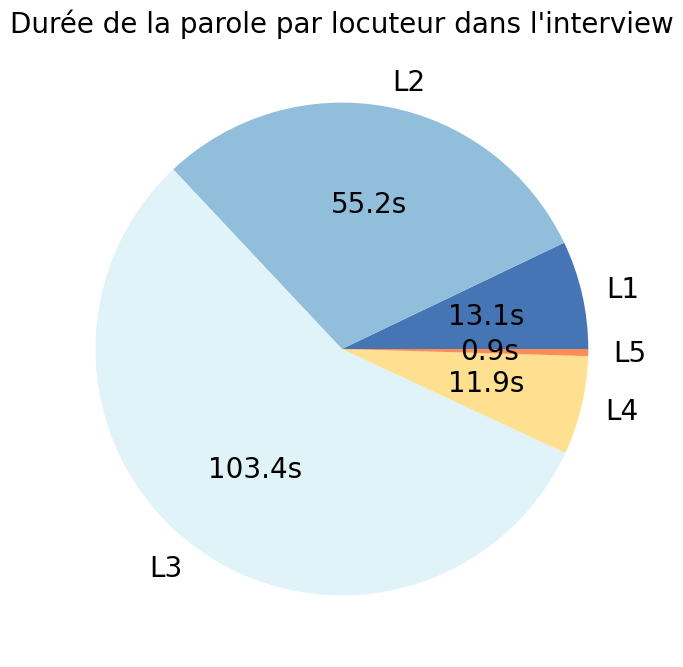

In [1]:
import matplotlib.pyplot as plt

data = {
    "L1": 13.102774182343197,
    "L2": 55.1528174924873,
    "L3": 103.41610440174685,
    "L4": 11.94810632404996,
    "L5": 0.8516255858174873
}

labels = list(data.keys())
sizes = list(data.values())

colors = ['#4575b4', '#91bfdb', '#e0f3f8', '#fee090', '#fc8d59']
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct=lambda p: '{:.1f}s'.format(p * sum(sizes) / 100),textprops={'fontsize': 20}, colors=colors)
plt.title('Durée de la parole par locuteur dans l\'interview', fontsize=20)
plt.show()
